### Load library & data

In [2]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
fruits = pd.read_table('fruit_data_with_colors.txt')

# show data
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create mapping from fruit value to fruit name
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
# check how many fruits are present in the data
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [5]:
# store data on 4 different dataframes
apple_data = fruits[fruits['fruit_name'] == 'apple']
orange_data = fruits[fruits['fruit_name'] == 'orange']
lemon_data = fruits[fruits['fruit_name'] == 'lemon']
mandarin_data = fruits[fruits['fruit_name'] == 'mandarin']

In [6]:
# show apple data samples
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [7]:
# show orange data samples
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [8]:
# show orange data samples
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


In [9]:
# show orange data samples
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


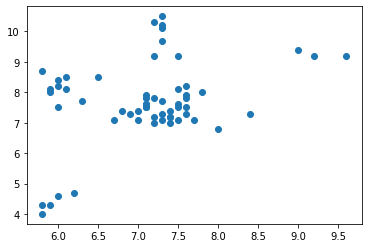

In [10]:
# visualize the data on plots
plt.scatter(fruits['width'], fruits['height'])

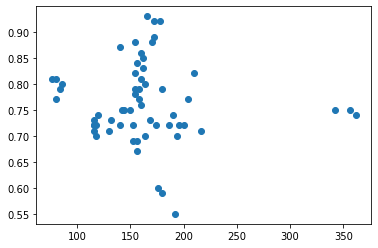

In [11]:
plt.scatter(fruits['mass'], fruits['color_score'])

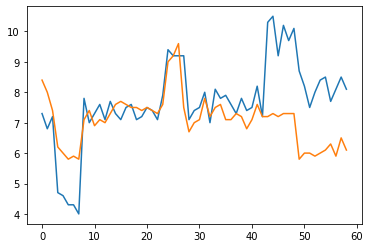

In [12]:
plt.plot(fruits['height'], label='height')
plt.plot(fruits['width'], label='width')
plt.show()

### Modeling

In [19]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# define X & Y
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# create train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [20]:
x_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,159.090909,7.038636,7.643182
std,53.316876,0.835886,1.370350
min,76.000000,5.800000,4.000000
25%,127.500000,6.175000,7.200000
50%,157.000000,7.200000,7.600000
75%,172.500000,7.500000,8.250000
max,356.000000,9.200000,10.500000


In [21]:
x_test.describe()

,mass,width,height
count,15.000000,15.00000,15.000000
mean,174.933333,7.30000,7.840000
std,60.075508,0.75119,1.369463
min,84.000000,6.00000,4.600000
25%,146.000000,7.10000,7.250000
50%,166.000000,7.20000,7.600000
75%,185.000000,7.45000,8.150000
max,362.000000,9.60000,10.300000


In [22]:
# create model object
knn = KNeighborsClassifier()

# train model
knn.fit(x_train, y_train)

# check the model score
knn.score(x_test, y_test)

0.5333333333333333

### Predict

In [24]:
# predict the mass, width, & height
prediction1 = knn.predict([['100', '6.3', '8']])
predct[prediction1[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'lemon'

In [25]:
# predict the mass, width, & height
prediction1 = knn.predict([['300', '7', '10']])
predct[prediction1[0]]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'orange'